In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folders=glob.glob("./Trails/*/*")
get_date=lambda f_name:f_name.split("\\")[-1].split("_")[0]

In [3]:
print("number of trails(down:52+ up:50)=",len(folders))

dates=list(map(get_date,folders))
trail_count_per_date=pd.DataFrame({"date":dates,"folder":folders}).groupby("date")["folder"].count()#.mean()

print(f"trail per day:mean={trail_count_per_date.mean():.2f}, std={trail_count_per_date.std():.2f}")

number of trails(down:52+ up:50)= 102
trail per day:mean=5.10, std=3.04


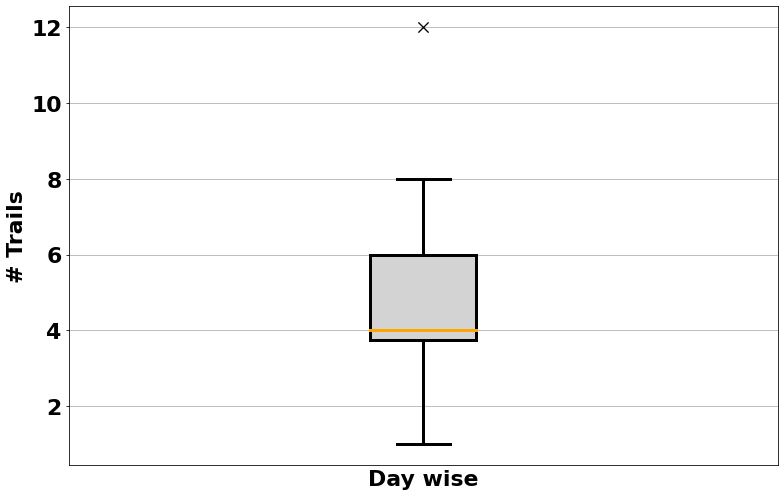

In [4]:
fig, ax = plt.subplots(figsize=(11,7))

bp1=\
ax.boxplot([trail_count_per_date.values],
        positions=[0],
        showfliers=True,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="lightgrey"),
        whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
        capprops=dict(linestyle='-',linewidth=3.0, color='black'),
        medianprops=dict(linestyle='-',linewidth=3.0, color='orange'),
        flierprops=dict(marker='x', markerfacecolor='green', markersize=10,linestyle='')
        )

ax.set_xlabel("Day wise",fontsize=22, fontweight='bold')
ax.set_ylabel("# Trails",fontsize=22, fontweight='bold')

ax.set_xticks([])
#ax.set_xticklabels(['Bus Stop','Turn','Signal','Congestion','Ad-hoc'],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()
fig.savefig("day_wise_trail_box.png")

In [5]:
#NICE